## Uber Data Analysis with Python

Uber Technologies, Inc., commonly known as Uber, is an American technology company. Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental.

We will mainly use data regarding Uber ride

In this we will use Python to analyze data from Uber.

## Import the necessary Libraries

In [53]:
import pandas as pd  
# Importing pandas library for data manipulation and analysis
import numpy as np  
# Importing numpy library for scientific computing
import matplotlib.pyplot as plt  
# Importing matplotlib.pyplot library for creating static, animated, and interactive visualizations in Python
import seaborn as sns
#Importing seaborn library for high-level interface for drawing attractive and informative statistical graphics.
import calendar
import datetime

In [2]:
data=pd.read_csv('Uber.csv') 
# Reading the data file using pandas library and storing its contents in a DataFrame object
data.head() 
# Displaying the first few rows of the DataFrame

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## Checking for Mising values

In [3]:
data.isnull().any()  

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [4]:
data.isnull().sum()   
# Counting the number of missing values in each column of the DataFrame

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [5]:
data=data.dropna()
#Dropping the null values

In [6]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [7]:
data.dtypes
#Checking the datatypes of the each column

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [8]:
data['START_DATE*']=pd.to_datetime(data['START_DATE*'],format='%m/%d/%Y %H:%M')
data['END_DATE*']=pd.to_datetime(data['END_DATE*'],format='%m/%d/%Y %H:%M')

In [9]:
data.dtypes   

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [10]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]

for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

In [11]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [12]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

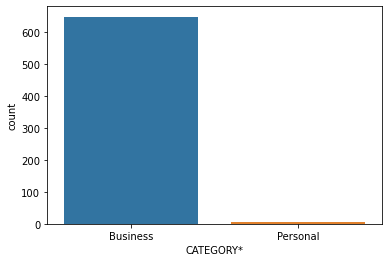

In [13]:
sns.countplot(x='CATEGORY*',data=data)

We have large number of business rides category as against very few personal rides.

<AxesSubplot:ylabel='Frequency'>

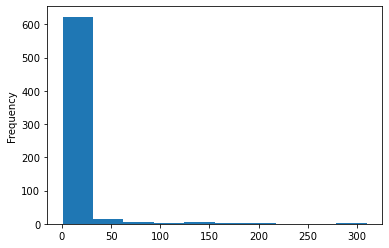

In [16]:
data['MILES*'].plot.hist()

mostly people travel in a short mile with Uber.

Text(0.5, 1.0, 'Number of trips vs hours')

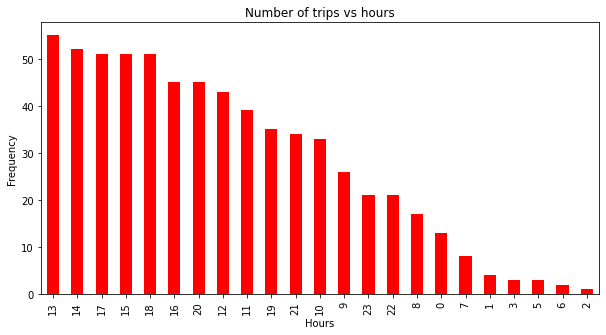

In [19]:
hours=data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips vs hours')

As we can see most people take Uber to their destination around the 13th hour(1pm) and the least hour is 2 am.

<AxesSubplot:>

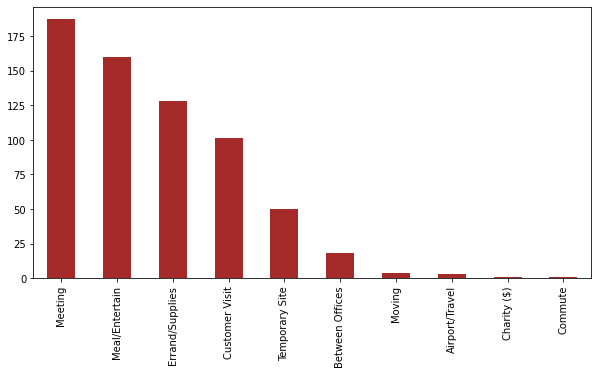

In [22]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

We can notice that mostly the purpose of the trip is meeting and meal/entertain.

<AxesSubplot:>

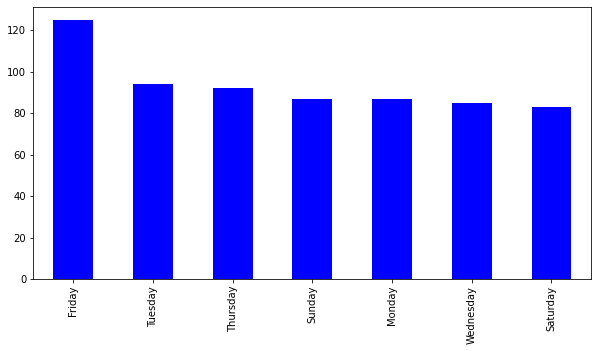

In [25]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

<AxesSubplot:xlabel='WEEKDAY', ylabel='count'>

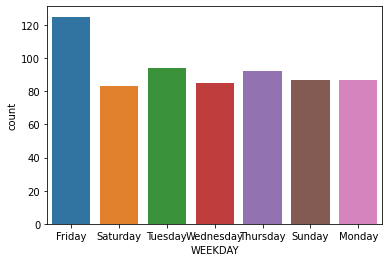

In [24]:
sns.countplot(x='WEEKDAY',data=data)

So Friday has the highest number of Trips.

<AxesSubplot:>

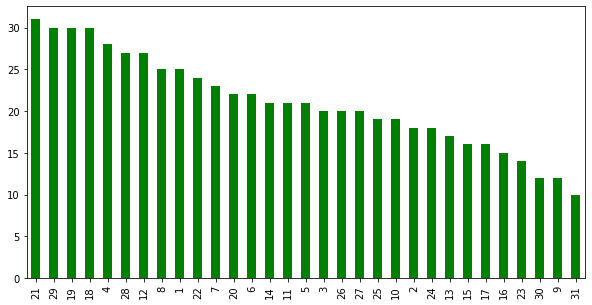

In [28]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

<AxesSubplot:>

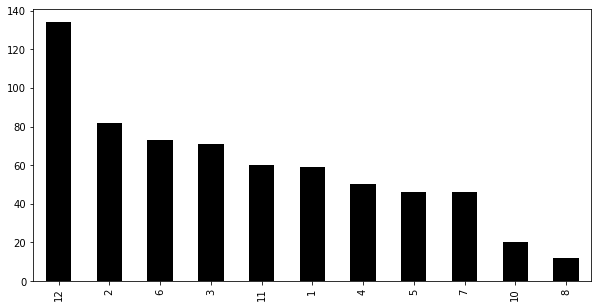

In [29]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='black')

We can see that December(12) has the most trips

<AxesSubplot:>

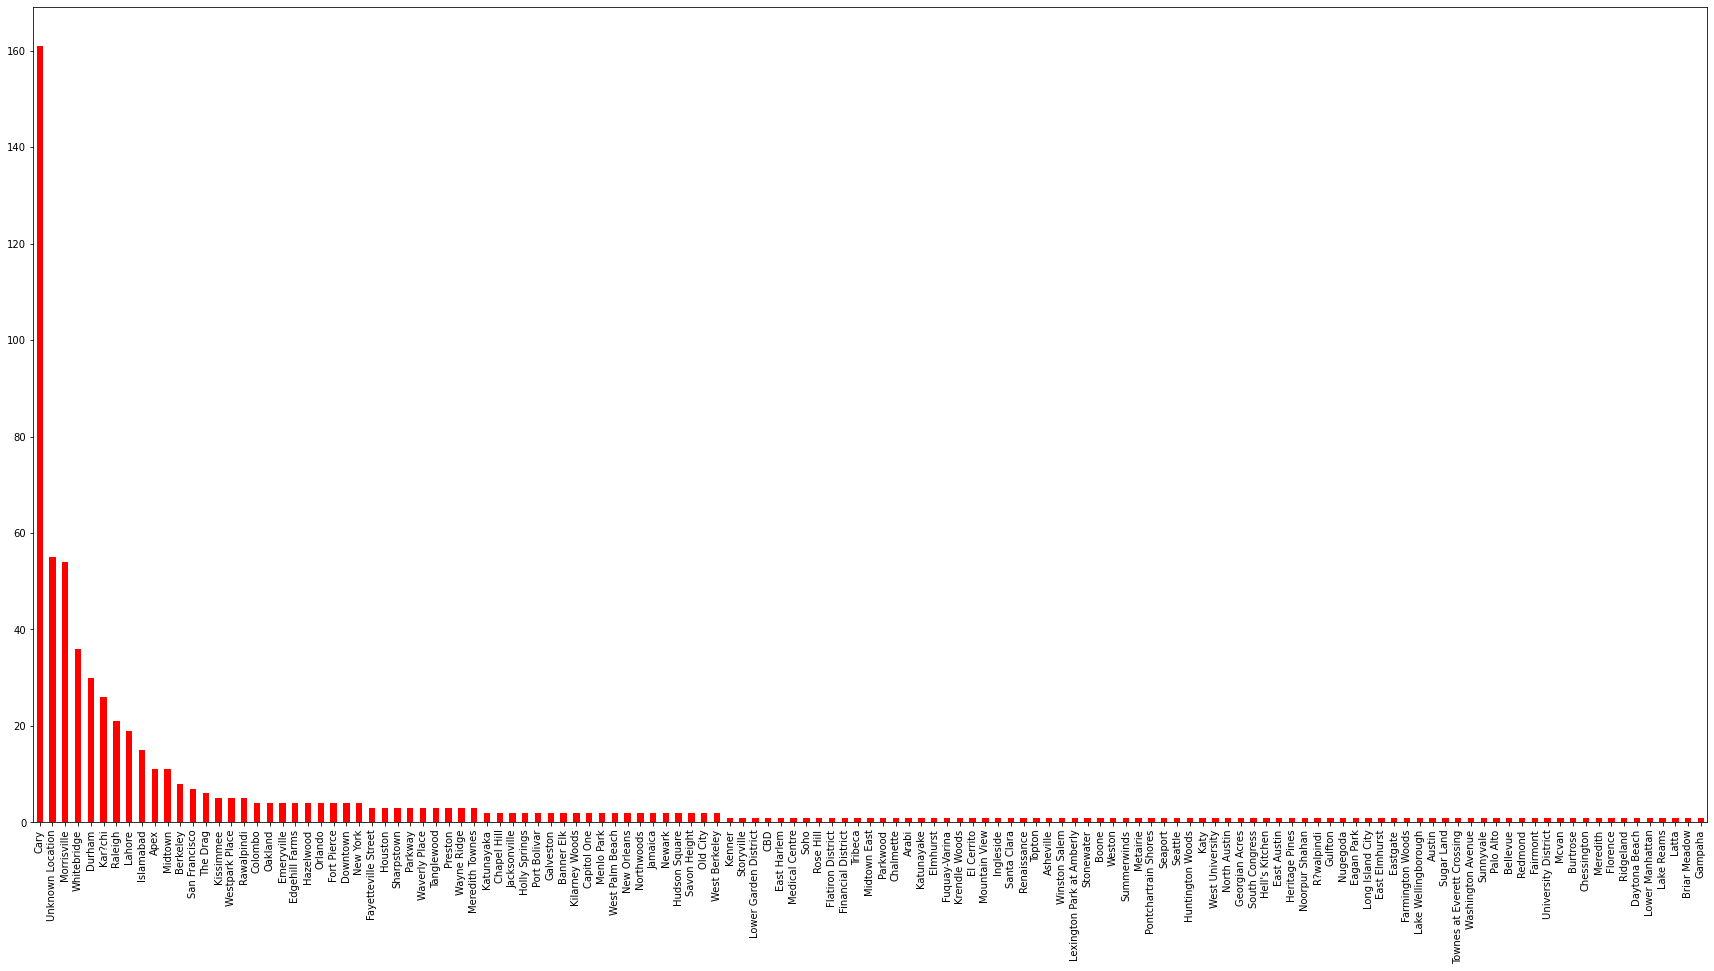

In [35]:
data['START*'].value_counts().plot(kind='bar',figsize=(30,15),color='red')

Most people in this dataset starts their journey from Cary followed by some unknown location and then Morrisville.